Import the libraries needed

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
from datetime import datetime
import psutil
from datetime import datetime
import psutil

import numpy as np
import os
import pyodbc
pyodbc.drivers()

# For the Yahoo Finance api
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 

import seaborn as sns

C:\Users\m033\Anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


### All the data used has been provisined in Get_The_Data.ipynb

In [2]:
pd.set_option('max_row', None)
#pd.options.display.max_rows = 1000

# Set a value for the home folder.
home_folder = "."

# Set values for the various paths.
input_path = home_folder + "\data"

cutoff_date = '20191231'

print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')


2024-08-05 21:28:57.191121
svmem(total=16756752384, available=6176501760, percent=63.1, used=10580250624, free=6176501760)


### Database connections and SQL to retrieve the various data needed.

In [3]:
pd.set_option('max_row', None)
#pd.options.display.max_rows = 1000

# Set a value for the home folder.
home_folder = "."

# Set values for the various paths.
input_path = home_folder + "\data"


# 1. Get all switchable policies

In [4]:
# giving directory name
filename = input_path + '\Full_Population.csv'
df_Horizon = pd.read_csv(filename, delimiter=',',low_memory=False, header=0)

# print stats.
print(len(df_Horizon.index))
print(df_Horizon.dtypes)

now = datetime.now()
print(now)
print('==========================')

# No displays to protect PII data
#df_Horizon.head(5)

8411354
ContractNumber    object
ProdCat           object
ProdCode          object
PolicyStatus      object
CoverEndDt        object
SnapshotDt        object
SnapshotYrMth      int64
dtype: object
2024-08-05 21:29:09.935805


## Filter to only take rows since 2020.

In [5]:
#df_Horizon['SnapshotDt'] = pd.to_datetime(df_Horizon['SnapshotDt'])
#df_Horizon['SnapshotDtStr'] = df_Horizon['SnapshotDt'].astype(str)
df_Horizon = df_Horizon[df_Horizon.SnapshotYrMth > 201912]

# print stats.
print(len(df_Horizon.index))
now = datetime.now()
print(now)
print('==========================')

print(df_Horizon.dtypes)
# No displays to protect PII data
#df_Horizon.head(5)

6012382
2024-08-05 21:29:10.789491
ContractNumber    object
ProdCat           object
ProdCode          object
PolicyStatus      object
CoverEndDt        object
SnapshotDt        object
SnapshotYrMth      int64
dtype: object


## Set the dates for historical switches.

In [6]:
df_Horizon['3_Months_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['3_Months_Ago'] = df_Horizon['3_Months_Ago'] + DateOffset(months=-3)
df_Horizon['3_Months_Ago'] = df_Horizon['3_Months_Ago'].dt.strftime('%Y%m%d')
df_Horizon["3_Months_Ago"] = df_Horizon['3_Months_Ago'].str.replace("-","").astype(int)

df_Horizon['6_Months_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['6_Months_Ago'] = df_Horizon['6_Months_Ago'] + DateOffset(months=-6)
df_Horizon['6_Months_Ago'] = df_Horizon['6_Months_Ago'].dt.strftime('%Y%m%d')
df_Horizon["6_Months_Ago"] = df_Horizon['6_Months_Ago'].str.replace("-","").astype(int)

df_Horizon['1_Year_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['1_Year_Ago'] = df_Horizon['1_Year_Ago'] + DateOffset(months=-12)
df_Horizon['1_Year_Ago'] = df_Horizon['1_Year_Ago'].dt.strftime('%Y%m%d')
df_Horizon["1_Year_Ago"] = df_Horizon['1_Year_Ago'].str.replace("-","").astype(int)

df_Horizon['2_Year_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['2_Year_Ago'] = df_Horizon['2_Year_Ago'] + DateOffset(months=-24)
df_Horizon['2_Year_Ago'] = df_Horizon['2_Year_Ago'].dt.strftime('%Y%m%d')
df_Horizon["2_Year_Ago"] = df_Horizon['2_Year_Ago'].str.replace("-","").astype(int)

df_Horizon['3_Year_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['3_Year_Ago'] = df_Horizon['3_Year_Ago'] + DateOffset(months=-36)
df_Horizon['3_Year_Ago'] = df_Horizon['3_Year_Ago'].dt.strftime('%Y%m%d')
df_Horizon["3_Year_Ago"] = df_Horizon['3_Year_Ago'].str.replace("-","").astype(int)

df_Horizon['4_Year_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['4_Year_Ago'] = df_Horizon['4_Year_Ago'] + DateOffset(months=-48)
df_Horizon['4_Year_Ago'] = df_Horizon['4_Year_Ago'].dt.strftime('%Y%m%d')
df_Horizon["4_Year_Ago"] = df_Horizon['4_Year_Ago'].str.replace("-","").astype(int)

df_Horizon['5_Year_Ago'] = pd.to_datetime(df_Horizon['SnapshotDt'])
df_Horizon['5_Year_Ago'] = df_Horizon['5_Year_Ago'] + DateOffset(months=-60)
df_Horizon['5_Year_Ago'] = df_Horizon['5_Year_Ago'].dt.strftime('%Y%m%d')
df_Horizon["5_Year_Ago"] = df_Horizon['5_Year_Ago'].str.replace("-","").astype(int)

# print stats.
print(len(df_Horizon.index))
now = datetime.now()
print(now)
print('==========================')

print(df_Horizon.dtypes)

# No displays to protect PII data
#df_Horizon.head(5)

6012382
2024-08-05 21:38:38.326412
ContractNumber    object
ProdCat           object
ProdCode          object
PolicyStatus      object
CoverEndDt        object
SnapshotDt        object
SnapshotYrMth      int64
3_Months_Ago       int32
6_Months_Ago       int32
1_Year_Ago         int32
2_Year_Ago         int32
3_Year_Ago         int32
4_Year_Ago         int32
5_Year_Ago         int32
dtype: object


# 2. Get all fund switch records.

In [7]:
# giving directory name
All_Switches = input_path + '\All_Switches.csv'
df_All_Switches = pd.read_csv(All_Switches, delimiter=',',low_memory=False, header=0)

# print stats.
print(len(df_All_Switches.index))

print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')

print(df_All_Switches.dtypes)

# No displays to protect PII data
#df_All_Switches.head(5)

201805
2024-08-05 21:38:39.590747
svmem(total=16756752384, available=3893366784, percent=76.8, used=12863385600, free=3893366784)
index                       int64
POLICY_NUMBER              object
LEGACY_FUND_CODE           object
PRODUCT                    object
PROCESSING_DATE            object
EFFECTIVE_DATE             object
UNIT_TYPE                  object
CHARGE_TYPE                object
CASH_VALUE                float64
RISK_COMMENCEMENT_DATE     object
Servicing_Broker_Code      object
Issue_Date                 object
Cover_End_Date             object
Anniversary_Date           object
Source                     object
SOURCE                     object
dtype: object


## Filter to only take rows since 2020.

In [11]:
# Filter out old dates.

df_All_Switches['PROCESSING_DATE'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
df_All_Switches['ProcessingYrMth'] = df_All_Switches['PROCESSING_DATE'].dt.strftime('%Y%m')

df_All_Switches = df_All_Switches[df_All_Switches.ProcessingYrMth > '201912']

# print stats.
print(len(df_All_Switches.index))

now = datetime.now()
print(now)
print('==========================')

print(df_All_Switches.dtypes)

# No displays to protect PII data
#df_All_Switches.head(5)

7242
2024-08-05 21:43:40.733373
POLICY_NUMBER              object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth            object
dtype: object


In [12]:


# Filter out old dates.
#df_All_Switches = df_All_Switches[df_All_Switches.Processing_INT > 20191231]

# Reorder the columns
df_All_Switches = df_All_Switches[['POLICY_NUMBER', 'PROCESSING_DATE','ProcessingYrMth']]

# print stats.
print(len(df_All_Switches.index))
# Set the processing date to a proper date and drop duplicates
#df_All_Switches = df_All_Switches.drop_duplicates(subset=['POLICY_NUMBER','PROCESSING_DATE','ProcessingYrMth','Processing_INT'], keep='first')
df_All_Switches = df_All_Switches.drop_duplicates(subset=['POLICY_NUMBER','ProcessingYrMth'], keep='first')


# print stats.
print(len(df_All_Switches.index))

now = datetime.now()
print(now)
print('==========================')

print(df_All_Switches.dtypes)

# No displays to protect PII data
#df_All_Switches.head(5)

7242
7242
2024-08-05 21:43:44.185392
POLICY_NUMBER              object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth            object
dtype: object


# 3. Merge the full population with the switches to create the prediction dataset.

In [13]:
# Change to int
df_All_Switches["ProcessingYrMth"] = df_All_Switches["ProcessingYrMth"].astype(int)
df_Horizon_with_Switches = pd.merge(df_Horizon, df_All_Switches, left_on = ['ContractNumber','SnapshotYrMth'], right_on = ['POLICY_NUMBER','ProcessingYrMth'] , how = 'left') 

# Change the Processing Date to a flag to indicate a switch.
df_Horizon_with_Switches['Switch_Flag'] = ''
df_Horizon_with_Switches = df_Horizon_with_Switches.drop(['POLICY_NUMBER'],axis=1)

# If the sum is less than 2, ignore this as a positive booking and set it to zero. Also set the positive booking flag.
df_Horizon_with_Switches['Switch_Flag'] = np.where(pd.isna(df_Horizon_with_Switches['PROCESSING_DATE']),0,1)

# print stats.
print(len(df_Horizon_with_Switches.index))

print(df_Horizon_with_Switches.dtypes)
print(df_All_Switches.dtypes)
print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')
print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

6012382
ContractNumber             object
ProdCat                    object
ProdCode                   object
PolicyStatus               object
CoverEndDt                 object
SnapshotDt                 object
SnapshotYrMth               int64
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth           float64
Switch_Flag                 int32
dtype: object
POLICY_NUMBER              object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
dtype: object
2024-08-05 21:43:59.395275
svmem(total=16756752384, available=6908563456, percent=58.8, used=9848188928, free=6908563456)
0    6006459
1       5923
Name: Switch_Flag, dtype: int64


# Add the comparable past switch dates for comparison.

In [14]:
df_All_Switches['3_Months_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['3_Months_Ago'] = df_All_Switches['3_Months_Ago'] + DateOffset(months=-3)
df_All_Switches['3_Months_Ago'] = df_All_Switches['3_Months_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["3_Months_Ago"] = df_All_Switches['3_Months_Ago'].str.replace("-","").astype(int)

df_All_Switches['6_Months_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['6_Months_Ago'] = df_All_Switches['6_Months_Ago'] + DateOffset(months=-6)
df_All_Switches['6_Months_Ago'] = df_All_Switches['6_Months_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["6_Months_Ago"] = df_All_Switches['6_Months_Ago'].str.replace("-","").astype(int)

df_All_Switches['1_Year_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['1_Year_Ago'] = df_All_Switches['1_Year_Ago'] + DateOffset(months=-12)
df_All_Switches['1_Year_Ago'] = df_All_Switches['1_Year_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["1_Year_Ago"] = df_All_Switches['1_Year_Ago'].str.replace("-","").astype(int)

df_All_Switches['2_Year_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['2_Year_Ago'] = df_All_Switches['2_Year_Ago'] + DateOffset(months=-24)
df_All_Switches['2_Year_Ago'] = df_All_Switches['2_Year_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["2_Year_Ago"] = df_All_Switches['2_Year_Ago'].str.replace("-","").astype(int)

df_All_Switches['3_Year_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['3_Year_Ago'] = df_All_Switches['3_Year_Ago'] + DateOffset(months=-36)
df_All_Switches['3_Year_Ago'] = df_All_Switches['3_Year_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["3_Year_Ago"] = df_All_Switches['3_Year_Ago'].str.replace("-","").astype(int)

df_All_Switches['4_Year_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['4_Year_Ago'] = df_All_Switches['4_Year_Ago'] + DateOffset(months=-48)
df_All_Switches['4_Year_Ago'] = df_All_Switches['4_Year_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["4_Year_Ago"] = df_All_Switches['4_Year_Ago'].str.replace("-","").astype(int)

df_All_Switches['5_Year_Ago'] = pd.to_datetime(df_All_Switches['PROCESSING_DATE'])
#df_All_Switches['5_Year_Ago'] = df_All_Switches['5_Year_Ago'] + DateOffset(months=-60)
df_All_Switches['5_Year_Ago'] = df_All_Switches['5_Year_Ago'].dt.strftime('%Y%m%d')
df_All_Switches["5_Year_Ago"] = df_All_Switches['5_Year_Ago'].str.replace("-","").astype(int)

# print stats.
print(len(df_All_Switches.index))
print(df_All_Switches.dtypes)
print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')

# No displays to protect PII data
#df_All_Switches.head(5)

7242
POLICY_NUMBER              object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
dtype: object
2024-08-05 21:44:00.906567
svmem(total=16756752384, available=6858801152, percent=59.1, used=9897951232, free=6858801152)


In [15]:
print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

0    6006459
1       5923
Name: Switch_Flag, dtype: int64


In [16]:
# Drop obsolete columns
#df_Horizon_with_Switches = df_Horizon_with_Switches.drop(['PROCESSING_DATE'],axis=1)
#df_Horizon_with_Switches = df_Horizon_with_Switches.drop(['ProcessingYrMth'],axis=1)

# print stats.
print(len(df_Horizon_with_Switches.index))

print(df_Horizon_with_Switches.dtypes)
print(df_All_Switches.dtypes)

print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

6012382
ContractNumber             object
ProdCat                    object
ProdCode                   object
PolicyStatus               object
CoverEndDt                 object
SnapshotDt                 object
SnapshotYrMth               int64
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth           float64
Switch_Flag                 int32
dtype: object
POLICY_NUMBER              object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
dtype: object
0    6006459
1       5923
Name: Switch_Flag, d

In [17]:
df_All_Switches.rename(columns = {'POLICY_NUMBER':'ContractNumber'}, inplace = True)

# print stats.
print(len(df_Horizon_with_Switches.index))

print(df_Horizon_with_Switches.dtypes)
print(df_All_Switches.dtypes)

print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

6012382
ContractNumber             object
ProdCat                    object
ProdCode                   object
PolicyStatus               object
CoverEndDt                 object
SnapshotDt                 object
SnapshotYrMth               int64
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth           float64
Switch_Flag                 int32
dtype: object
ContractNumber             object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
dtype: object
0    6006459
1       5923
Name: Switch_Flag, d

In [18]:
df_Horizon_with_Switches.dtypes

ContractNumber             object
ProdCat                    object
ProdCode                   object
PolicyStatus               object
CoverEndDt                 object
SnapshotDt                 object
SnapshotYrMth               int64
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth           float64
Switch_Flag                 int32
dtype: object

In [19]:
df_All_Switches.dtypes

ContractNumber             object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
dtype: object

In [20]:
df_All_Switches['SnapshotYrMth'] = pd.to_numeric(df_All_Switches['ProcessingYrMth'], errors="coerce").fillna(0).astype('int64')
df_All_Switches.dtypes

ContractNumber             object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
SnapshotYrMth               int64
dtype: object

In [21]:
# print stats.
print(len(df_Horizon_with_Switches.index))

6012382


In [22]:
df_Horizon_with_Switches['Any_Switch'] = df_Horizon_with_Switches.ContractNumber.isin(df_All_Switches.ContractNumber).astype(int)
#df_Horizon_with_Switches['Past_Switch'] = df_All_Switches['PROCESSING_DATE'].lt(df_Horizon_with_Switches['PROCESSING_DATE']) & df_Horizon_with_Switches.ContractNumber.isin(df_All_Switches.ContractNumber).astype(int)

print(df_Horizon_with_Switches['Any_Switch'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

0    5760772
1     251610
Name: Any_Switch, dtype: int64


## Set the flag for where a contract has some kind of past switch.

0    6012377
1          5
Name: Past_Switch, dtype: int64


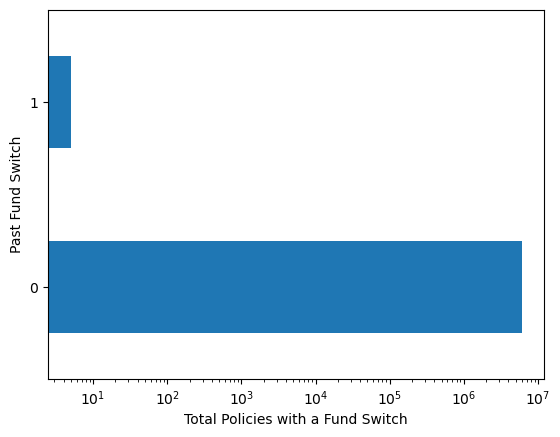

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [23]:
# Check how many policies with a switch have had a past switch.
df_Horizon_with_Switches['Past_Switch'] = (((df_Horizon_with_Switches.ContractNumber).isin
                                            (df_All_Switches.ContractNumber).astype(int)) & 
                                           ((df_All_Switches.SnapshotYrMth.astype(int)).le
                                            (df_Horizon_with_Switches.SnapshotYrMth).astype(int)))

# Count and print the values. 
print(df_Horizon_with_Switches['Past_Switch'].value_counts())

# plot value_counts of Series
ax = df_Horizon_with_Switches['Past_Switch'].value_counts().plot(kind='barh')

# Set axis headings.
ax.set(xlabel='Total Policies with a Fund Switch', ylabel='Past Fund Switch')
ax.set_xscale('log')

ax.figure.savefig('Fund switch policies with a prior switch.png')  # saves the current figure

In [24]:
ax

<AxesSubplot:xlabel='Total Policies with a Fund Switch', ylabel='Past Fund Switch'>

# No significant past fund switch activity indicating potential future switches so no need to proceed.

## Clean up the file.

In [25]:

df_Horizon_with_Switches = df_Horizon_with_Switches.drop(['SnapshotYrMth','3_Months_Ago','6_Months_Ago','1_Year_Ago','2_Year_Ago','3_Year_Ago','4_Year_Ago','5_Year_Ago','PROCESSING_DATE','ProcessingYrMth','Any_Switch','Past_Switch'],axis=1)
# print stats.
print(len(df_Horizon_with_Switches.index))

print(df_Horizon_with_Switches.dtypes)
print(df_All_Switches.dtypes)
print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')
print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

6012382
ContractNumber    object
ProdCat           object
ProdCode          object
PolicyStatus      object
CoverEndDt        object
SnapshotDt        object
Switch_Flag        int32
dtype: object
ContractNumber             object
PROCESSING_DATE    datetime64[ns]
ProcessingYrMth             int32
3_Months_Ago                int32
6_Months_Ago                int32
1_Year_Ago                  int32
2_Year_Ago                  int32
3_Year_Ago                  int32
4_Year_Ago                  int32
5_Year_Ago                  int32
SnapshotYrMth               int64
dtype: object
2024-08-05 21:44:46.181919
svmem(total=16756752384, available=6893813760, percent=58.9, used=9862938624, free=6893813760)
0    6006459
1       5923
Name: Switch_Flag, dtype: int64


# Now write out the data to file and in another notebook, add the rest of the features that need to be synthesised because of PII.

In [26]:
# Write out to a comma separated values file.
filename = input_path + '\Full_Population_With_Switch_Flags.csv'
df_Horizon_with_Switches.to_csv(filename, encoding='utf-8', index=False)        

# Types and row count
print(df_Horizon_with_Switches.dtypes)
print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')
print(df_Horizon_with_Switches['Switch_Flag'].value_counts())

print(filename)

# No displays to protect PII data
#df_Horizon_with_Switches.head(5)

ContractNumber    object
ProdCat           object
ProdCode          object
PolicyStatus      object
CoverEndDt        object
SnapshotDt        object
Switch_Flag        int32
dtype: object
2024-08-05 21:46:07.433201
svmem(total=16756752384, available=8931389440, percent=46.7, used=7825362944, free=8931389440)
0    6006459
1       5923
Name: Switch_Flag, dtype: int64
.\data\Full_Population_With_Switch_Flags.csv


In [27]:
%who_ls DataFrame 

['df_All_Switches', 'df_Horizon', 'df_Horizon_with_Switches']

In [28]:
del df_All_Switches
del df_Horizon
del df_Horizon_with_Switches

print('==========================')
now = datetime.now()
print(now)
print('==========================')
print(psutil.virtual_memory())
print('==========================')

2024-08-05 21:46:08.568563
svmem(total=16756752384, available=9918341120, percent=40.8, used=6838411264, free=9918341120)
